# 手写数据识别

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [5]:
# 加载sklearn自带的手写识别数据集
digits = datasets.load_digits()
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [10]:
print(digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [12]:
X = digits.data

In [13]:
y = digits.target

In [14]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [15]:
y[100:]

array([4, 0, 5, ..., 8, 9, 8])

In [16]:
# 看一下X中的某个具体的值
X[666]

array([ 0.,  0.,  5., 15., 14.,  3.,  0.,  0.,  0.,  0., 13., 15.,  9.,
       15.,  2.,  0.,  0.,  4., 16., 12.,  0., 10.,  6.,  0.,  0.,  8.,
       16.,  9.,  0.,  8., 10.,  0.,  0.,  7., 15.,  5.,  0., 12., 11.,
        0.,  0.,  7., 13.,  0.,  5., 16.,  6.,  0.,  0.,  0., 16., 12.,
       15., 13.,  1.,  0.,  0.,  0.,  6., 16., 12.,  2.,  0.,  0.])

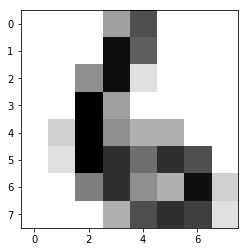

In [33]:
# 完全看不出来这些是什么，下面用matplotlib.pyplot画一下看看

# 这里用到了新的方法：plt.imshow(some_digit_image,cmap=matplotlib.cm.binary
# 这个方法是用来画图的，有兴趣可以看相关文档

some_digit_image = X[750].reshape(8,8)
plt.imshow(some_digit_image,cmap=matplotlib.cm.binary)


In [22]:
from MachineLearning.script.model_selection import train_test_split

In [23]:
X_train, y_train, X_test, y_test = train_test_split(X,y)

(1438, 64)
(1438,)
(359, 64)
(359,)


In [24]:
X_train

array([[ 0.,  0.,  7., ...,  3.,  0.,  0.],
       [ 0.,  2., 13., ...,  1.,  0.,  0.],
       [ 0.,  1., 12., ...,  8.,  1.,  0.],
       ...,
       [ 0.,  4., 15., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.]])

In [25]:
from MachineLearning.script import KNN

In [26]:
my_knn_clf = KNN.KNNClassifier(k=3)

In [27]:
my_knn_clf.fit(X_train,y_train)

KNN(k=3)

In [28]:
y_predict = my_knn_clf.predict(X_test)
y_predict

array([3, 7, 5, 8, 9, 3, 8, 0, 6, 0, 7, 8, 4, 1, 9, 7, 1, 2, 2, 6, 4, 1,
       3, 9, 3, 1, 5, 2, 9, 8, 1, 4, 5, 6, 3, 5, 0, 8, 5, 3, 3, 4, 0, 9,
       2, 0, 6, 1, 2, 1, 0, 3, 3, 1, 5, 7, 3, 6, 7, 6, 8, 9, 2, 6, 1, 3,
       5, 6, 2, 4, 3, 2, 0, 9, 5, 1, 6, 6, 4, 3, 0, 6, 4, 9, 5, 5, 0, 8,
       8, 3, 3, 2, 2, 9, 6, 4, 0, 7, 1, 3, 7, 5, 1, 2, 4, 3, 5, 8, 1, 4,
       1, 1, 4, 8, 2, 1, 1, 1, 3, 3, 2, 7, 6, 7, 2, 0, 7, 3, 8, 3, 0, 7,
       8, 5, 7, 5, 4, 4, 4, 1, 7, 3, 8, 8, 5, 5, 5, 9, 4, 8, 4, 3, 0, 9,
       0, 8, 1, 7, 7, 9, 1, 8, 6, 5, 4, 0, 3, 0, 4, 5, 2, 1, 3, 3, 4, 0,
       1, 1, 9, 5, 4, 9, 5, 6, 2, 8, 2, 5, 6, 9, 7, 9, 3, 1, 5, 5, 6, 3,
       1, 9, 5, 3, 1, 4, 0, 3, 8, 9, 5, 1, 8, 5, 2, 9, 0, 4, 2, 7, 0, 0,
       2, 8, 4, 4, 1, 5, 3, 1, 3, 2, 2, 0, 8, 4, 6, 7, 1, 3, 7, 7, 0, 9,
       6, 4, 8, 3, 3, 0, 2, 8, 5, 5, 5, 2, 4, 0, 1, 9, 3, 3, 0, 2, 6, 7,
       9, 2, 5, 6, 5, 9, 5, 0, 6, 3, 1, 9, 0, 9, 2, 5, 2, 7, 4, 5, 2, 5,
       8, 7, 9, 8, 7, 2, 3, 7, 9, 8, 4, 0, 2, 8, 7,

In [29]:
y_test

array([3, 7, 5, 8, 9, 3, 8, 0, 6, 0, 7, 8, 4, 1, 9, 7, 1, 2, 2, 6, 4, 1,
       3, 9, 3, 1, 5, 2, 9, 8, 1, 4, 5, 6, 3, 5, 0, 8, 5, 3, 3, 4, 0, 9,
       2, 0, 6, 1, 2, 1, 0, 3, 3, 1, 5, 7, 3, 6, 7, 6, 8, 9, 2, 6, 1, 3,
       5, 6, 2, 4, 3, 2, 0, 9, 5, 1, 6, 6, 4, 3, 0, 6, 4, 9, 5, 5, 0, 8,
       8, 3, 3, 2, 2, 9, 6, 4, 0, 7, 1, 3, 7, 5, 1, 2, 4, 3, 5, 8, 1, 4,
       1, 1, 4, 8, 2, 1, 1, 1, 3, 3, 2, 7, 6, 7, 2, 0, 7, 3, 8, 3, 0, 7,
       8, 5, 7, 5, 4, 4, 4, 1, 3, 3, 8, 8, 5, 5, 5, 9, 4, 8, 4, 3, 0, 9,
       0, 8, 8, 7, 7, 3, 1, 8, 6, 5, 4, 0, 3, 0, 4, 5, 2, 8, 3, 3, 4, 0,
       1, 1, 9, 5, 4, 9, 5, 6, 2, 8, 2, 5, 6, 9, 7, 9, 3, 1, 5, 5, 6, 3,
       1, 9, 5, 3, 1, 4, 0, 3, 8, 9, 5, 1, 8, 5, 2, 9, 0, 4, 2, 7, 0, 0,
       2, 6, 4, 4, 1, 5, 3, 1, 3, 2, 2, 0, 8, 9, 6, 7, 1, 3, 7, 7, 0, 9,
       6, 4, 8, 3, 3, 0, 2, 8, 5, 5, 5, 2, 4, 0, 1, 9, 3, 3, 0, 2, 6, 7,
       9, 2, 5, 6, 5, 9, 5, 0, 6, 3, 1, 9, 0, 9, 2, 9, 2, 7, 4, 5, 2, 5,
       8, 7, 9, 8, 7, 2, 3, 7, 9, 8, 4, 0, 2, 8, 7,

### 使用封装好的metrics类来检测预测准确率

In [34]:
from MachineLearning.script import metrics

In [35]:
retio = metrics.accuracy_score(y_test,y_predict)
retio

0.9777158774373259

### 使用sklearn中的accuracy_score来检验预测准确率

In [46]:
from sklearn import model_selection
_X_train,_X_test,_y_train,_y_test = model_selection.train_test_split(X,y)

In [47]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(_X_train,_y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [48]:
_y_predict = knn_clf.predict(_X_test)

In [49]:
from sklearn.metrics import accuracy_score
accuracy_score(_y_test,_y_predict)

0.9822222222222222